# Prediction Using Unsupervised Machine Learning

# AUTHOR - RAJESH KUMAR S

## Question Statement
## From the given IRIS dataset, predict the optimum number of clusters and represent it visually

## Importing all the required libraries

In [11]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing first 20 datasets

In [19]:
#importing the Iris datasets
d=pd.read_csv("Iris.csv")
d.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [82]:
print("Data Imported Successfully!!")

Data Imported Successfully!!


## Visualizing Data

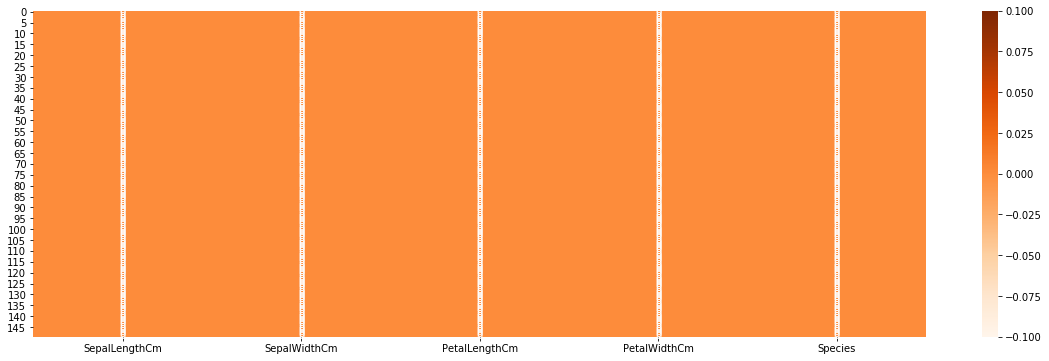

In [33]:
plt.figure(figsize=(20,6))
sns.heatmap(d.isnull(),annot=True,cmap="Oranges")

In [34]:
d.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


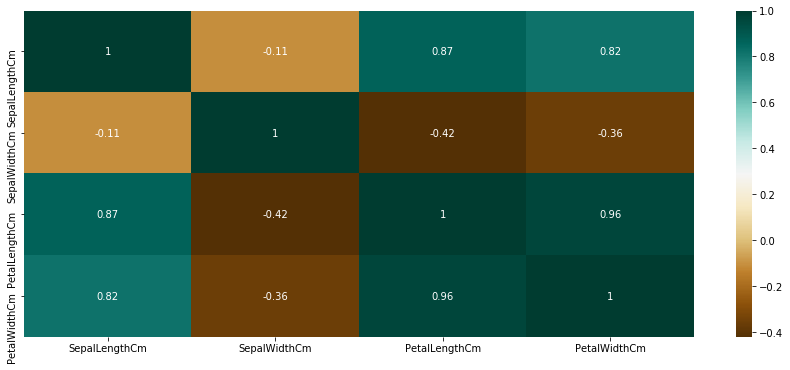

In [42]:
#HeatMap Visualization
plt.figure(figsize=(15,6))
sns.heatmap(d.corr(),annot=True,cmap="BrBG")

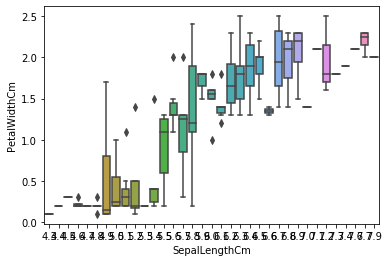

In [94]:
#BoxPlot Visualization
sns.boxplot(x=d['SepalLengthCm'],y=d['PetalWidthCm'])

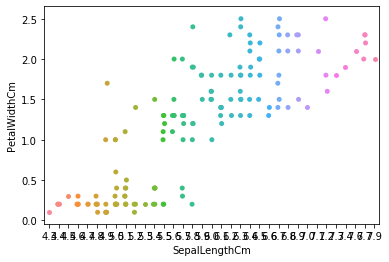

In [95]:
#StripSwarmPlot Visualization
sns.stripplot(x=d['SepalLengthCm'],y=d['PetalWidthCm'])

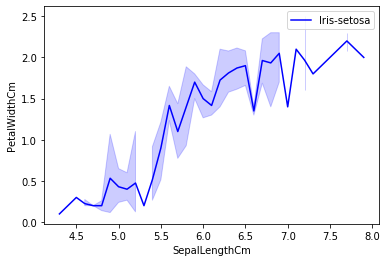

In [105]:
#LinePlot Visualization
sns.lineplot(x=d['SepalLengthCm'],y=d['PetalWidthCm'],color= 'blue', label= 'Iris-setosa')


## Data Cleaning

In [45]:
d.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
d.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## By using the Elbow Method we coud find the number of clusters for Kmeans

In [57]:
#Finding the number of clusters for K-means classification

x = d.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1,22):
    kmeans=KMeans(n_clusters =i, init='k-means++',
    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

## Plotting the results through line graphical representation thus it will obtain 'elbow method' 

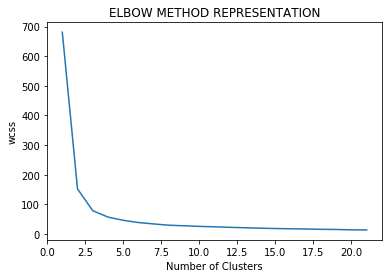

In [59]:
plt.plot(range(1,22),wcss)
plt.title('ELBOW METHOD REPRESENTATION')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss') #Within Cluster Sum of Squares
plt.show()

## Graphical Explanation

From the above graph we can see clearly that the number of clusters are not attaining saturation nor increasing with respect to the WCSS (Within Cluster Sum of Squares). This is called as ELBOW METHOD.

## Dataset Training with respect to k-means

In [63]:
kmeans=KMeans(n_clusters =i, init='k-means++',
    max_iter=300, n_init=10, random_state=0)
y_kmeans= kmeans.fit_predict(x)
y_kmeans

array([ 1, 17,  9, 17,  1, 13,  9,  1, 14, 17,  1, 17, 17, 14, 13, 13, 13,
        1, 13,  1,  1,  1,  9,  1, 17, 17,  1,  1,  1, 17, 17,  1, 13, 13,
       17,  9,  1, 17, 14,  1,  9, 14, 14,  1,  1, 17,  1, 17,  1,  9, 11,
       11, 11,  4, 11,  7, 15, 12, 11,  4, 12,  7,  4,  2,  4, 11,  7,  7,
        2,  4, 15,  7,  6,  2,  2, 11, 11, 11,  2,  4,  4,  4,  4,  6,  7,
       15, 11,  2,  7,  4,  7,  2,  4, 12,  7,  7,  7,  2, 12,  7, 19, 18,
        5,  0,  0,  8, 20,  5,  0, 19, 16,  0, 16, 18, 18, 10,  0,  3,  8,
        6, 19, 18,  8,  6, 19,  5, 15, 15,  0,  5,  5,  3,  0,  6,  6,  5,
       10,  0, 15, 16, 19, 16, 18, 19, 19, 16,  6, 16, 10, 15])

## Visualizing Data with the Output

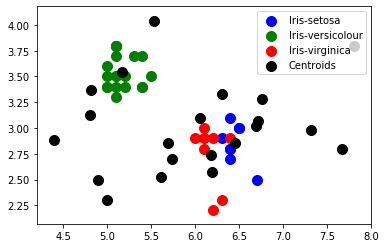

In [68]:
#Plotting the clusters 
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
s = 100, c= 'blue', label= 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
s = 100, c= 'green', label= 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
s = 100, c= 'red', label= 'Iris-virginica')

#Plotting the centroids for  the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()


## Conclusion

Hence I conclude that K Means Clustering is obtained with the help of 'elbow method' and visualizations are drawn simultaneously. 